In [10]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats.stats import pearsonr
from mplsoccer.pitch import Pitch
import os
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

In [ ]:
plt.style.use('fivethirtyeight')
params = {'axes.titlesize': 'x-large',
          'axes.labelsize': 'large', 
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'}
plt.rcParams.update(params)

In [2]:
shots = pd.read_excel('extracted_data/shots_pred.xlsx')
matches = pd.read_excel('extracted_data/matches.xlsx')
players =  pd.read_excel('extracted_data/players.xlsx')

In [3]:
# calculate goal distance in meters
shots.loc[:, 'goal_distance_m'] = [np.sqrt(np.square((120-shots['location_x'].iloc[i])/120*105) + np.square((40-shots['location_y'].iloc[i])/80*70)) for i in range(len(shots))]

In [4]:
shots.head()

,duration,match_id,minute,second,under_pressure,pass_height,assistant_id,location_x,location_y,team_id,player_id,goalkeeper_id,goal,statsbomb_xg,first_touch,follows_dribble,foot_shot,header,open_goal,defender,midfielder,striker,goal_distance,regular_play,from_corner,from_free_kick,from_throw_in,from_counter,from_pressing,from_goal_kick,from_keeper,from_kick_off,backheel,diving_header,half_volley,lob,overhead_kick,volley,corner,free_kick,open_play,penalty,kick_off,goal_angle,num_teammates,num_opposition,gk_in_goal,pred_xg,goal_distance_m
0,1.586764,9592,2,10,0,1,5211,106.0,57.8,217,5503,6792,0,0.026399,0,0,1,0,0,0,0,1,22.645971,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,12.703542,0,1,1,0.034972,19.815225
1,2.356000,9592,18,34,0,1,-1,90.0,29.1,217,5246,6792,0,0.025043,0,0,1,0,0,0,0,1,31.918803,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,13.459294,1,4,1,0.050498,27.928953
2,0.480919,9592,25,9,1,1,5470,110.0,39.5,217,5503,6792,1,0.484256,0,0,1,0,0,0,0,1,10.012492,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,43.517792,0,1,1,0.350635,8.760931
3,0.392120,9592,29,31,0,1,-1,96.0,21.1,217,5246,6792,0,0.046703,0,0,1,0,0,0,0,1,30.548486,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,11.823033,0,4,1,0.050222,26.729925
4,0.512047,9592,30,13,0,1,5503,106.0,39.6,217,5470,6792,0,0.334151,0,0,1,0,0,0,1,0,14.005713,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,31.867962,0,1,1,0.264497,12.254999


In [5]:
shots.shape

(12003, 49)

In [6]:
print('Schüsse: ' + str(len(shots)))
print('Tore: ' + str(len(shots[shots['goal'] == 1])))
print('Erwartete Tore: ' + str(int(shots['pred_xg'].sum())))
print('Trefferquote: ' + str(np.round(100 * len(shots[shots['goal'] == 1]) / len(shots), 2)) + '%')

Schüsse: 12003
Tore: 1645
Erwartete Tore: 1679
Trefferquote: 13.7%


Barplots & Boxplots

In [41]:
def bar_plot(feature):
    fig = plt.figure(figsize=(7,4))
    ax = fig.add_axes([0,0,1,1])
    nums = [shots.loc[shots[feature] == x, 'pred_xg'].mean() for x in shots[feature].unique()]
    ax.bar(x=shots[feature].unique(), height=nums)
    plt.xticks(shots[feature].unique())
    plt.title('xG in Abhängigkeit von ' + feature)
    plt.ylabel('Trefferwahrscheinlichkeit')
    plt.xlabel(feature)
    plt.show()

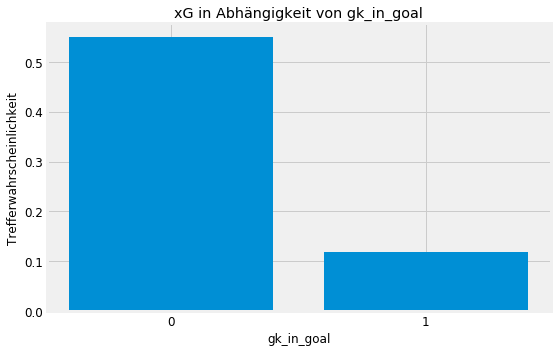

In [68]:
bar_plot('gk_in_goal')

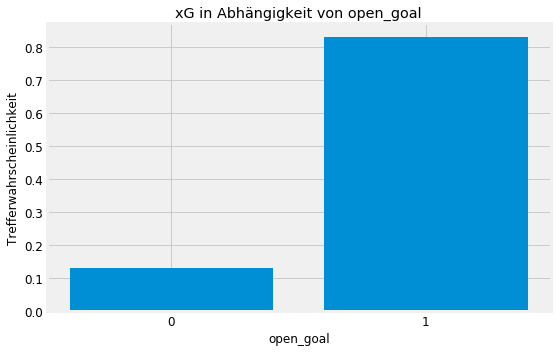

In [53]:
bar_plot('open_goal')

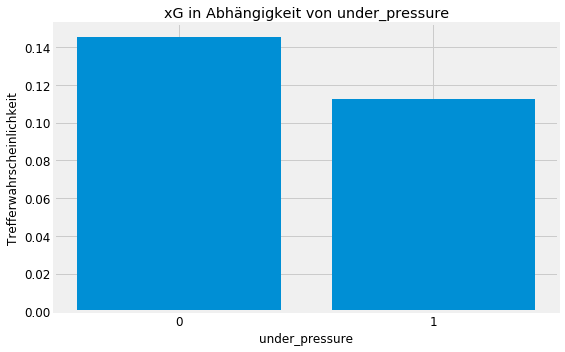

In [19]:
bar_plot('under_pressure')

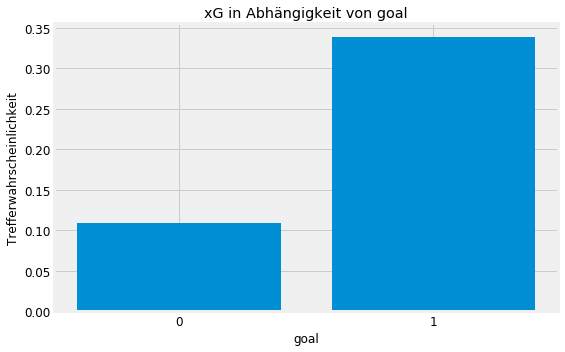

In [20]:
bar_plot('goal')

In [333]:
def box_plot(feature):
    fig = plt.figure(figsize=(7,4))
    ax = fig.add_axes([0,0,1,1])
    nums = [shots.loc[shots['goal'] == 0, feature] for x in shots[feature].unique()]
    ax.boxplot([shots.loc[shots['goal'] == 0, feature], shots.loc[shots['goal'] == 1, feature]], labels=['Kein Tor', 'Tor'])
    plt.title(feature + ' in Abhängigkeit vom Torerfolg')
    plt.ylabel(feature)
    plt.show()

C:\Users\Juhaninho\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


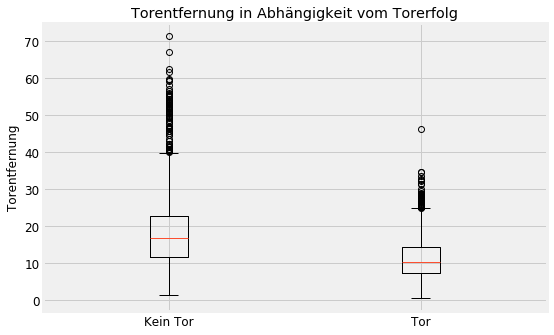

In [339]:
box_plot('goal_distance_m')

C:\Users\Juhaninho\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


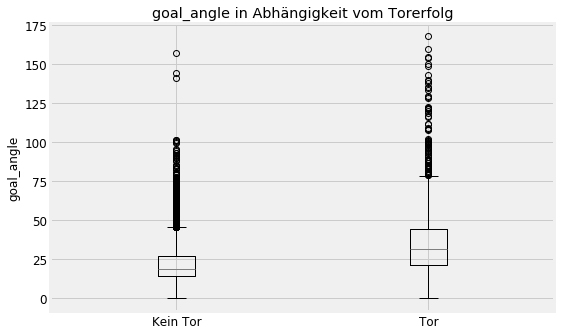

In [23]:
box_plot('goal_angle')

C:\Users\Juhaninho\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


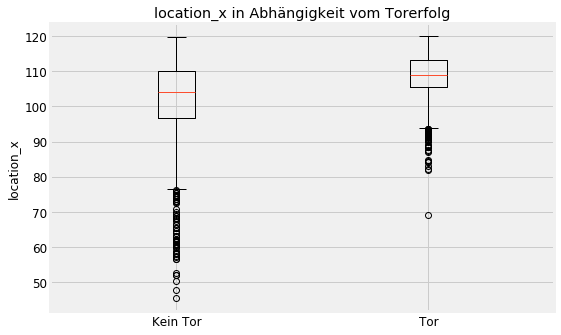

In [24]:
box_plot('location_x')

C:\Users\Juhaninho\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


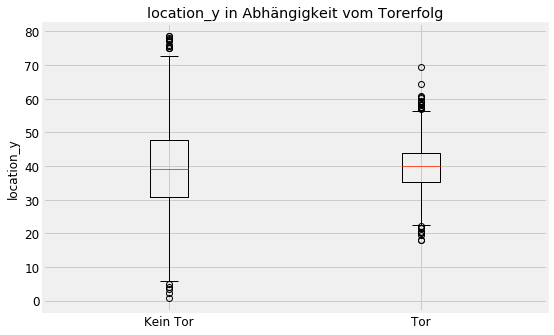

In [25]:
box_plot('location_y')

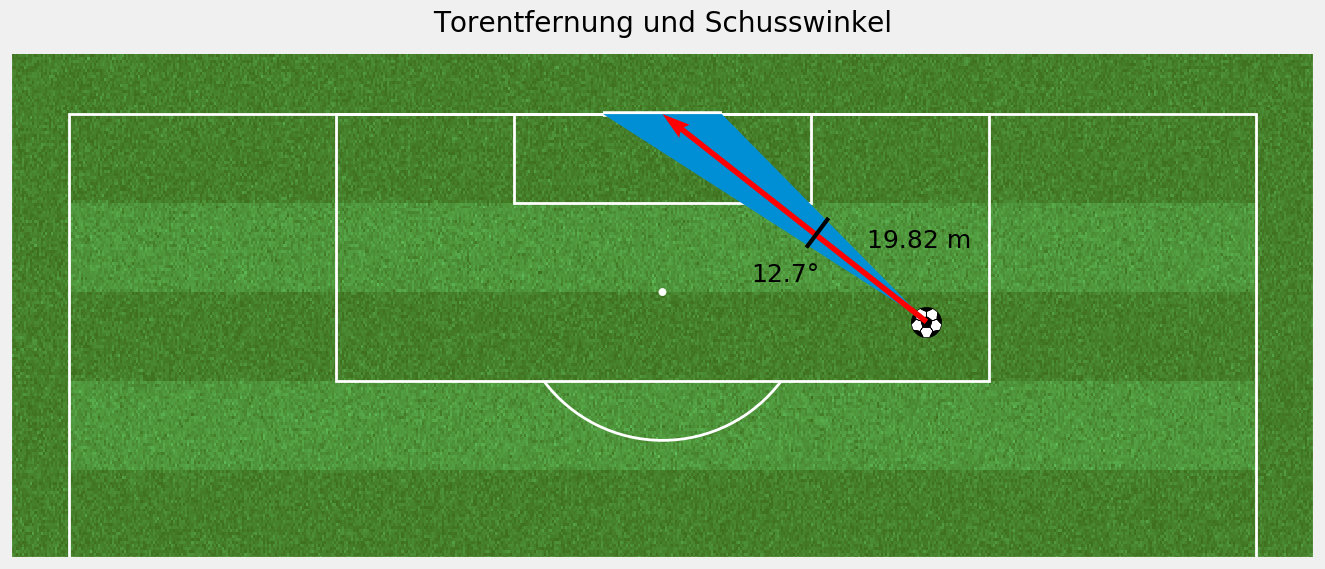

In [718]:
# Diagramm zur Torentfernung und zum Schusswinkel
pitch = Pitch(figsize=(15,8), pitch_color='grass', line_color='white', stripe=True, axis=True, 
              orientation='vertical', tight_layout=False)
fig, ax = pitch.draw()
shot = shots.iloc[0]
shot_x = shot['location_x']
shot_y = shot['location_y']
pitch.scatter(shot_x, shot_y, ax=ax, marker='football')
pitch.goal_angle(shot_x, shot_y, ax=ax)
pitch.arrows(shot_x, shot_y, 120, 40, ax=ax, color='red', linewidth=4)
pitch.lines(113, 51.2, 111, 49.7, ax=ax, color='black', linewidth=3)
pitch.annotate(str(np.round(shot['goal_distance_m'], 2)) + ' m', (shot_x, shot_y), (shot_x+5, shot_y-4), fontsize=18, ax=ax)
pitch.annotate(str(np.round(shot['goal_angle'], 2)) + '°', (shot_x, shot_y), (108.7, 46), fontsize=18, ax=ax)
plt.ylim(90,125)
plt.title('Torentfernung und Schusswinkel')
plt.show()

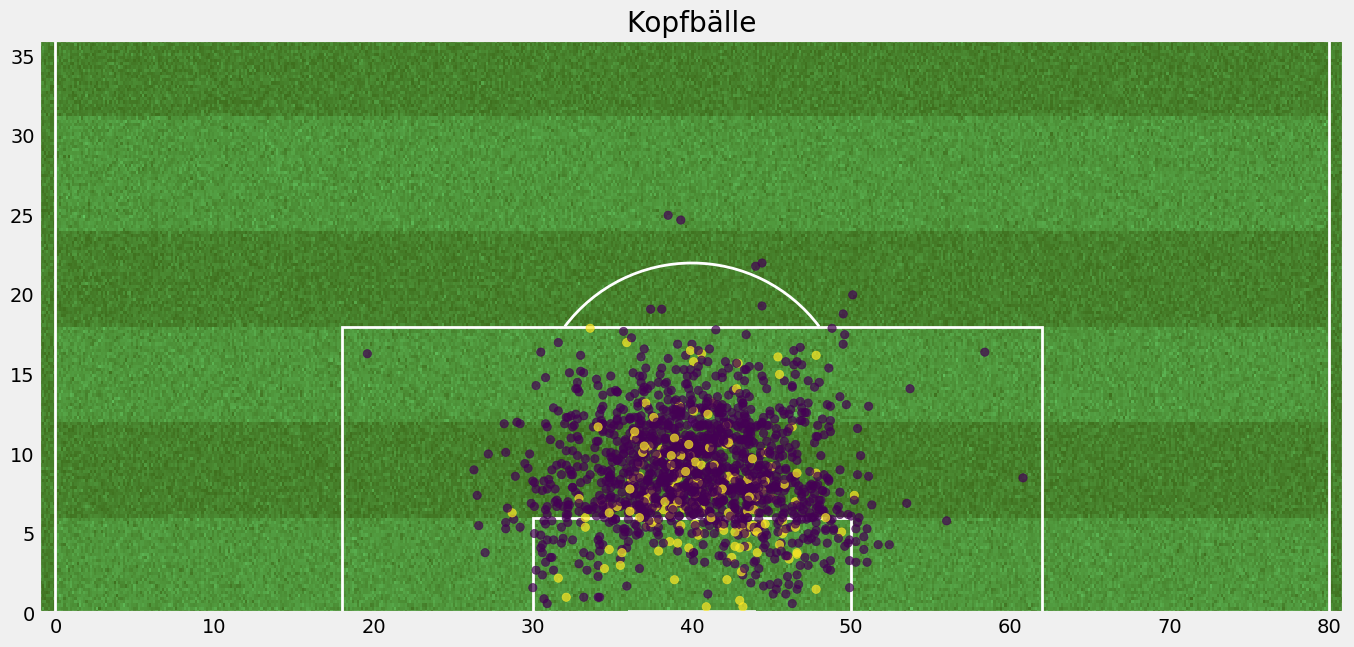

In [659]:
header = shots[shots['header'] == 1]
pitch = Pitch(figsize=(15,8), pitch_color='grass', line_color='white', stripe=True, axis=True, label=True, tick=True,
              orientation='vertical', tight_layout=False)
fig, ax = pitch.draw()
ax.scatter(80-header['location_y'], 120-header['location_x'], c=header['goal'], alpha=0.7)
plt.ylim(0,36)
plt.xlim(-1,81)
plt.title('Kopfbälle')
plt.show()

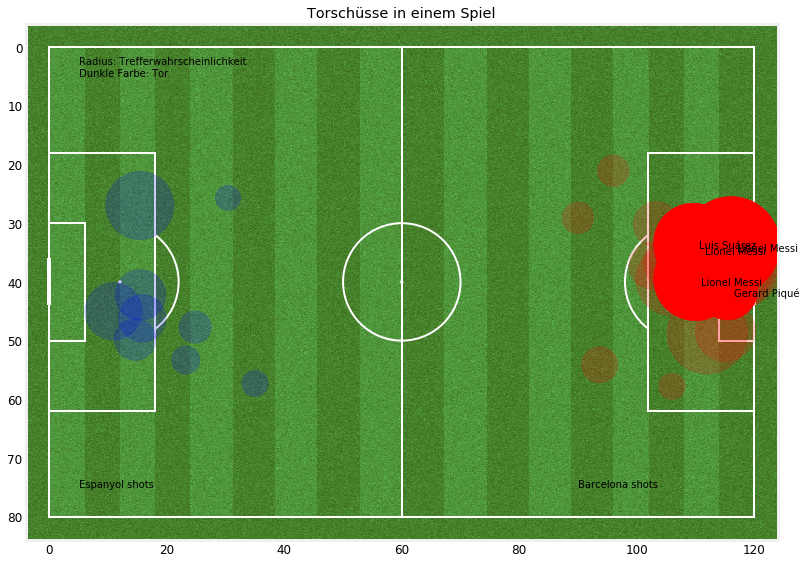

In [35]:
team1_id = 217
team2_id = 214
team1_name = matches.loc[matches['home_team_id'] == team1_id, 'home_team_name'].iloc[0]
team2_name = matches.loc[matches['away_team_id'] == team2_id, 'away_team_name'].iloc[0]

pitch = Pitch(figsize=(12,15), pitch_color='grass', line_color='white', stripe=True, axis=True, label=True, tick=True,
              orientation='horizontal', tight_layout=False)
fig, ax = pitch.draw()

#Plot the shots
for idx, shot in shots.head(29).iterrows():
    x = shot['location_x']
    y = shot['location_y']
    goal = shot['goal'] == 1
    team_id = shot['team_id']
    #circleSize = 2
    circleSize = np.sqrt(shot['pred_xg'])*12
    player_name = players.loc[players['player_id'] == shot['player_id'], 'player_nickname'].iloc[0]
    if not isinstance(player_name, str):
        player_name = players.loc[players['player_id'] == shot['player_id'], 'player_name'].iloc[0]
    if (team_id == team1_id):
        if goal:
            shotCircle = plt.Circle((x,y), circleSize, color="red")
            plt.text((x+1), y+1, player_name) 
        else:
            shotCircle = plt.Circle((x,y), circleSize, color="red")     
            shotCircle.set_alpha(.2)
    elif (team_id == team2_id):
        if goal:
            shotCircle = plt.Circle((120-x,80-y), circleSize, color="blue") 
            plt.text((120-x+1), 80-y+1, player_name) 
        else:
            shotCircle = plt.Circle((120-x,80-y), circleSize, color="blue")      
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)
    
plt.text(5, 75, team2_name + ' shots')
plt.text(90, 75, team1_name + ' shots')
plt.text(5, 5, 'Radius: Trefferwahrscheinlichkeit\nDunkle Farbe: Tor')
plt.title('Torschüsse in einem Spiel')
#fig.savefig('Output/shots.pdf', dpi=100)
plt.show()

In [37]:
# calculate correlation between three variables
def get_corr(x, y, z='goal', single_corr=True):
    df = shots[[x, y, z]]
    corr = df.corr()
    xz = corr.loc[x, z]
    yz = corr.loc[y, z]
    xy = corr.loc[x, y]
    if single_corr:
        print(x + ': ' + str(xz))
        print(y + ': ' + str(yz))
    R2 = (abs(xz**2) + abs(yz**2) - 2*xz*yz*xy) / (1-abs(xy**2))
    n = len(df)
    k = 2 # Number of independent variables
    R2_adj = 1 - ( ((1-R2)*(n-1)) / (n-k-1) )
    return R2_adj

In [38]:
get_corr('open_play', 'foot_shot')

open_play: -0.041828268730461256
foot_shot: 0.029376243704060685


0.0021854399384484413

In [39]:
X = shots.drop(['goal', 'statsbomb_xg', 'pred_xg'], axis=1, inplace=False)

In [40]:
for i in range(len(X.columns)):
    for j in range(i+1, len(X.columns)):
        x = X.columns[i]
        y = X.columns[j]
        corr = get_corr(x, y, single_corr=False)
        if abs(corr) > 0.1:
            print(x + ' + ' + y + ': ' + str(corr))

duration + goal_angle: 0.10735890965739625
match_id + goal_angle: 0.10232335227278477
minute + goal_angle: 0.10274332405329722
second + goal_angle: 0.10254690751874518
under_pressure + goal_angle: 0.10855314319592269
pass_height + goal_angle: 0.12125842686124888
assistant_id + goal_angle: 0.10627186227041541
location_x + goal_angle: 0.10497439573875
location_x + gk_in_goal: 0.10765096024377696
location_y + goal_angle: 0.10244298952211284
team_id + goal_angle: 0.10367755369315945
player_id + goal_angle: 0.10350716469755827
goalkeeper_id + goal_angle: 0.104683447254038
first_touch + goal_angle: 0.1048324887051485
follows_dribble + goal_angle: 0.10236026032003886
foot_shot + goal_angle: 0.13696594426221842
header + goal_angle: 0.13675926839188846
open_goal + goal_distance: 0.10849607574008813
open_goal + penalty: 0.10366729360379945
open_goal + goal_angle: 0.11792368817719856
defender + goal_angle: 0.10729757249799154
midfielder + goal_angle: 0.10231346642318595
striker + goal_angle: 0.10

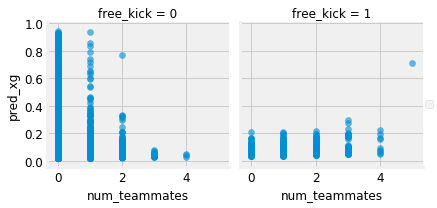

In [44]:
sns.FacetGrid(shots, col='free_kick').map(plt.scatter, 'num_teammates', 'pred_xg', alpha =0.6).add_legend()

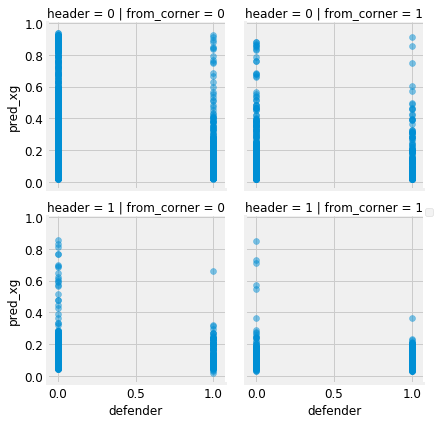

In [45]:
sns.FacetGrid(shots, col="from_corner", row="header").map(plt.scatter, "defender", "pred_xg", alpha = 0.5).add_legend()

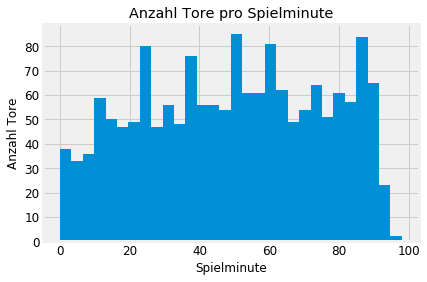

In [46]:
goals = shots[shots['goal'] == 1]
plt.hist(goals['minute'], bins=30)
plt.title('Anzahl Tore pro Spielminute')
plt.xlabel('Spielminute')
plt.ylabel('Anzahl Tore')
plt.show()